# Visualise targets for simulation

3D plot showing the targets for simulation

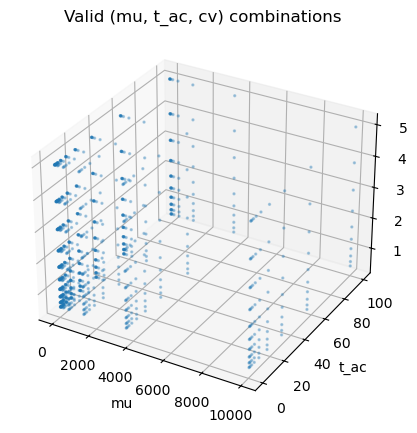

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
# Load the full grid of verified targets
mu_target = np.logspace(0, 4, 10)  # 1 to 10000
t_ac_target = np.logspace(-0.3, 2, 10)  # ~0.5 to 100
cv_target = np.logspace(-0.3, 0.7, 10)  # ~0.5 to 5
targets = np.array(np.meshgrid(mu_target, t_ac_target, cv_target)).T.reshape(-1, 3)

# Create a 3D scatter plot of mu vs t_ac vs cv
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(targets[:, 0], targets[:, 1], targets[:, 2], s=2, alpha=0.3)
ax.set_xlabel('mu')
ax.set_ylabel('t_ac')
ax.set_zlabel('cv')
ax.set_title('Valid (mu, t_ac, cv) combinations')
plt.show()


Data distribution plots for the specified stats

CV values range from 0.50 to 5.01.


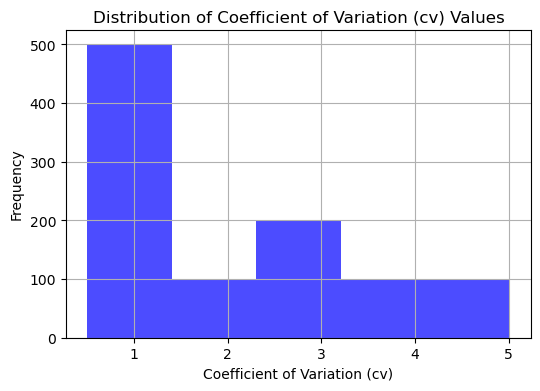

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df_targets = pd.DataFrame(targets, columns=['mu', 't_ac', 'cv'])
# what ranges of CV values are chosen? 
cv_min = df_targets['cv'].min()
cv_max = df_targets['cv'].max()
print(f"CV values range from {cv_min:.2f} to {cv_max:.2f}.")
# plot the distribution of cv values chosen
plt.figure(figsize=(6, 4))
plt.hist(df_targets['cv'], bins=5, color='blue', alpha=0.7)
plt.xlabel('Coefficient of Variation (cv)')
plt.ylabel('Frequency')
plt.title('Distribution of Coefficient of Variation (cv) Values')
plt.grid()  
plt.show()

mu values range from 1.00 to 10000.00.


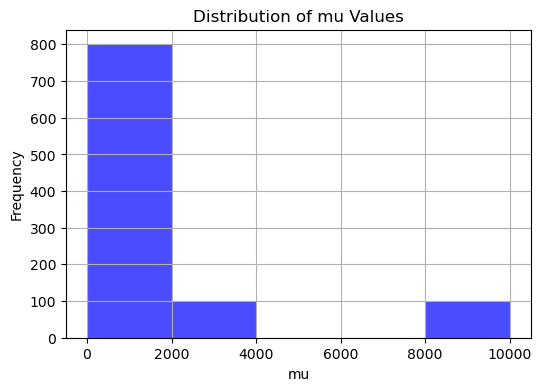

In [8]:
mu_min = df_targets['mu'].min()
mu_max = df_targets['mu'].max()
print(f"mu values range from {mu_min:.2f} to {mu_max:.2f}.")
# plot the distribution 
plt.figure(figsize=(6, 4))
plt.hist(df_targets['mu'], bins=5, color='blue', alpha=0.7)
plt.xlabel('mu')
plt.ylabel('Frequency')
plt.title('Distribution of mu Values')
plt.grid()  
plt.show()

t_ac values range from 0.50 to 100.00.


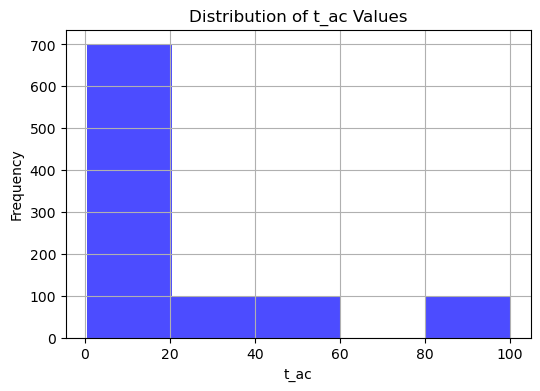

In [9]:
t_ac_min = df_targets['t_ac'].min()
t_ac_max = df_targets['t_ac'].max()
print(f"t_ac values range from {t_ac_min:.2f} to {t_ac_max:.2f}.")
# plot the distribution 
plt.figure(figsize=(6, 4))
plt.hist(df_targets['t_ac'], bins=5, color='blue', alpha=0.7)
plt.xlabel('t_ac')
plt.ylabel('Frequency')
plt.title('Distribution of t_ac Values')
plt.grid()  
plt.show()

2D histograms for pairwise parameter combinations

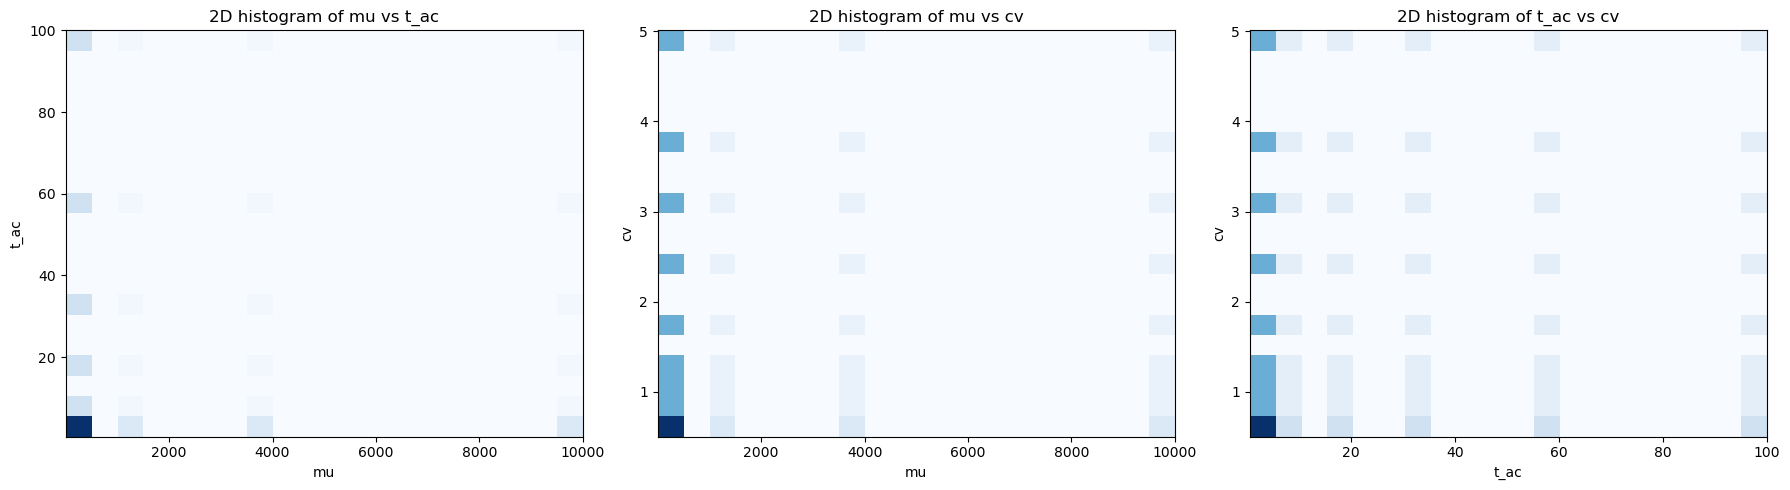

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist2d(df_targets['mu'], df_targets['t_ac'], bins=20, cmap='Blues')
axes[0].set_xlabel('mu')
axes[0].set_ylabel('t_ac')
axes[0].set_title('2D histogram of mu vs t_ac')

axes[1].hist2d(df_targets['mu'], df_targets['cv'], bins=20, cmap='Blues')
axes[1].set_xlabel('mu')
axes[1].set_ylabel('cv')
axes[1].set_title('2D histogram of mu vs cv')

axes[2].hist2d(df_targets['t_ac'], df_targets['cv'], bins=20, cmap='Blues')
axes[2].set_xlabel('t_ac')
axes[2].set_ylabel('cv')
axes[2].set_title('2D histogram of t_ac vs cv')

plt.tight_layout()
plt.show()

Visualise realised vs target statistics

In [36]:
import pandas as pd, numpy as np
from pathlib import Path
from stats.mean import calculate_mean
from stats.variance import calculate_variance
from stats.cv import calculate_cv
from stats.autocorrelation import autocrosscorr, calculate_ac_time_interp1d

data_dir = Path('/home/s1732775/SSA/experiments/EXP-25-IY010/data_1')
# this is the csv file showing the result record with the system parameters, observed stats, rel. errors and trajectory filenames
results = pd.read_csv(f'/home/s1732775/SSA/experiments/EXP-25-IY010/data_1/IY010_simulation_parameters.csv')
success_results = results[results['success'] == True].reset_index(drop=True)
# print success rate
success_rate = len(success_results) / len(results)
print(f"Success rate: {success_rate:.2%} ({len(success_results)} out of {len(results)})")
success_stats=success_results[['mu_target','cv_target','t_ac_target','mu_observed', 'cv_observed','t_ac_observed']]
success_stats

Success rate: 66.24% (565 out of 853)


,mu_target,cv_target,t_ac_target,mu_observed,cv_observed,t_ac_observed
0,1.000000,1.079775,0.902725,0.999489,1.073439,0.932877
1,1.000000,1.394583,0.902725,1.018464,1.384222,0.951371
2,1.000000,1.801174,0.902725,1.014190,1.798890,0.928957
3,1.000000,1.079775,1.625965,0.984500,1.091461,1.651001
4,1.000000,1.079775,2.928645,0.987479,1.091359,2.831203
...,...,...,...,...,...,...
560,3593.813664,3.880511,5.274997,3603.792767,3.871408,5.586361
561,3593.813664,5.011872,5.274997,3772.353010,4.608245,60.234722
562,3593.813664,0.501187,9.501185,3659.038302,0.491673,8.470156
563,3593.813664,0.647308,9.501185,3484.942736,0.642386,8.727230


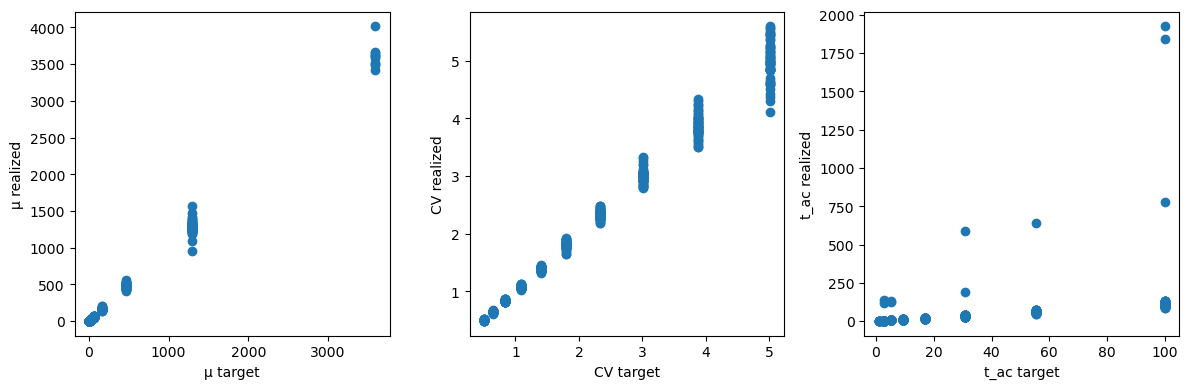

In [35]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].scatter(success_stats['mu_target'], success_stats['mu_observed'])
axes[0].set_xlabel('μ target'); axes[0].set_ylabel('μ realized')
axes[1].scatter(success_stats['cv_target'], success_stats['cv_observed'])
axes[1].set_xlabel('CV target'); axes[1].set_ylabel('CV realized')
axes[2].scatter(success_stats['t_ac_target'], success_stats['t_ac_observed'])
axes[2].set_xlabel('t_ac target'); axes[2].set_ylabel('t_ac realized')
plt.tight_layout()
plt.show()

Example of when tolerance fails